# Breast Cancer using Big Data Tools

### Step 0

You are part of a research team using Big Data tools to help oncologists identify breast cancer cases more efficiently. To analyze large datasets effectively, you're asked to set up a reliable computing environment using PySpark. This step ensures your tools are ready, setting the foundation for a scalable and collaborative analysis.


**Import the germane library**

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# CodeGrade step0
from pyspark.sql import SparkSession
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a Spark session
spark = SparkSession.builder \
    .appName("Breast Cancer Analysis") \
    .getOrCreate()
spark.sparkContext.setLogLevel('ERROR')

Using Spark's default log4j profile: org/apache/spark/log4j2-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/08/09 15:57:20 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


### Step 1

You need a fast and distributed framework for real-time data processing. By creating a Spark session, you're simulating how hospital systems manage real-time data, ensuring the analysis pipeline is efficient and functional.

**Create a Spark session where the name is "Breast Cancer Analysis" and verify that it is running by using this:**

```
if (spark.getActiveSession()):
    print('yes')
else:
    print('no')
```

In [3]:
# CodeGrade step1

if (spark.getActiveSession()):
    print('yes')
else:
    print('no')

yes


# Step 2

 Hospitals often store patient data in distributed databases. To prepare for further analysis and visualizations, you're tasked with loading the breast cancer dataset into Spark and converting it into a Pandas DataFrame. This mirrors the real-world task of preparing large datasets for team collaboration and actionable insights.


* **Load the data**
* **Create `df_pandas = spark_df.toPandas()`**

In [4]:
# CodeGrade step0

# Load the dataset into a PySpark DataFrame
spark_df = spark.read.csv("breast_cancer.csv", header=True, inferSchema=True)

In [5]:
# CodeGrade step2
df_pandas = spark_df.toPandas()
df_pandas.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,_c32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,None
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,None
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,None
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,None
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,None


### Step 3

As a new hire, your manager wants you to understand the structure of the dataset before diving into analysis. Displaying records and data types ensures you comprehend the data's shape and quality, just like how doctors ensure they have complete patient records before making decisions.

*   **Load the data**
*   **Display records and data types**
*.  **Give (not print) the rows and columns in this format**
```
num_rows
num_cols
```







In [6]:
# Run this code

# Display schema and first few rows
spark_df.printSchema()
spark_df.show(5)

root
 |-- id: integer (nullable = true)
 |-- diagnosis: string (nullable = true)
 |-- radius_mean: double (nullable = true)
 |-- texture_mean: double (nullable = true)
 |-- perimeter_mean: double (nullable = true)
 |-- area_mean: double (nullable = true)
 |-- smoothness_mean: double (nullable = true)
 |-- compactness_mean: double (nullable = true)
 |-- concavity_mean: double (nullable = true)
 |-- concave points_mean: double (nullable = true)
 |-- symmetry_mean: double (nullable = true)
 |-- fractal_dimension_mean: double (nullable = true)
 |-- radius_se: double (nullable = true)
 |-- texture_se: double (nullable = true)
 |-- perimeter_se: double (nullable = true)
 |-- area_se: double (nullable = true)
 |-- smoothness_se: double (nullable = true)
 |-- compactness_se: double (nullable = true)
 |-- concavity_se: double (nullable = true)
 |-- concave points_se: double (nullable = true)
 |-- symmetry_se: double (nullable = true)
 |-- fractal_dimension_se: double (nullable = true)
 |-- radi

In [7]:
s_df_cols = spark_df.columns
print(s_df_cols)

['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', '_c32']


In [8]:
# CodeGrade step3
num_rows = spark_df.count()
num_cols = len(spark_df.columns)

### Step 4

The dataset you’re working with may contain inconsistencies, just as hospital records sometimes do. Cleaning the data helps ensure the findings are reliable and aligns with your responsibility to maintain high standards in healthcare analytics.

*   **Select the 50th row**
  * **Call this `row_50`**
* **Find the radius mean value value of the 50th row**
  * **Call this `radius_mean_value`**

In [9]:
# CodeGrade step4
row_50 = spark_df.take(50)[-1]
radius_mean_value = row_50['radius_mean']
print(radius_mean_value)

13.49


### Step 5

You’re tasked with helping oncologists identify critical patterns. By focusing on key features in the dataset, you’re pinpointing variables that significantly impact diagnoses, guiding doctors in making evidence-based decisions

* **Find the counts of the number of malignant and benign diagnosis**
  * **Call these `m_count` and `b_count`, respectively**
* **Then take the difference of malignant and benign**
  * **Call this `diagnosis_diff`**


In [10]:
# CodeGrade step5
# malignant count
m_count = spark_df[spark_df['diagnosis']=='M'].count()
print(f'Malignant count: {m_count}')
# benign count
b_count = spark_df[spark_df['diagnosis']=='B'].count()
print(f'Benign count: {b_count}')
# difference
diagnosis_dif = b_count - m_count
print(f'Difference: {diagnosis_dif}')

Malignant count: 212
Benign count: 357
Difference: 145


### Step 6

A chief oncologist asks you to present findings to a panel. Visualizing the data allows you to communicate complex results effectively, enabling stakeholders to grasp critical insights that aid in policy decisions or medical strategies.

Create a *relative frequency* bar plot to show the distribution of benign and malignant cases. **bold text**
* **Call the Plot "Diagnosis Class Balance", the x-axis "Diagnosis", and the y-axis "Relative Frequency"**
* **Print the relative frequency of the Malignant cases**
  * **The last line of code should be**
    > **`relative_frequencies['M']`**



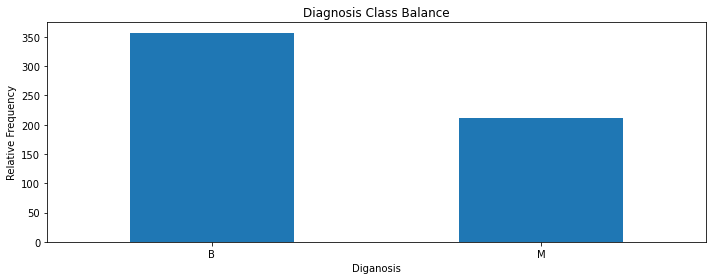

In [11]:
#CodeGrade step6
fig, ax = plt.subplots(figsize=(10,4))
df_pandas['diagnosis'].value_counts().plot(kind='bar')
plt.title('Diagnosis Class Balance')
plt.ylabel('Relative Frequency')
plt.xlabel('Diganosis')
plt.xticks(rotation=0)
plt.tight_layout();

In [12]:
# relative frequency of M
total = df_pandas['diagnosis'].value_counts().sum()
diagn_cnts = df_pandas['diagnosis'].value_counts()
relative_freqs = diagn_cnts / total

# print freq of M
relative_freqs['M']

0.37258347978910367

### Step 7

In the fight against cancer, the insights drawn depend heavily on the way data is processed. By creating new features or transforming existing ones, you're emulating how doctors refine raw observations into meaningful diagnostic indicators. This task helps extract deeper insights from the dataset, simulating the development of more precise diagnostic tools.

**Use PySpark's `.describe()` to see statistics for each feature, which will help you understand the ranges and distributions of the data.**

**Convert the PySpark DataFrame to Pandas for these calculations:**
* **maximum of the `fractal_dimension_mean`**
  * **Call this `max_fractal_dimension_mean`**
* **minimum of the `symmetry_mean`**
  * **Call this `min_symmetry_mean`**

**Take the absolute value of the difference of the `max_fractal_dimension_mean` and `min_symmetry_mean`.**
*  **Round to four decimal places**
*  **Call this `range_diff`**

In [13]:
# Run this code

# Use PySpark to describe the dataset
spark_df.describe().show()

+-------+--------------------+---------+------------------+-----------------+-----------------+-----------------+--------------------+-------------------+-------------------+--------------------+--------------------+----------------------+------------------+------------------+------------------+-----------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+------------------+------------------+------------------+-----------------+--------------------+-------------------+-------------------+--------------------+-------------------+-----------------------+----+
|summary|                  id|diagnosis|       radius_mean|     texture_mean|   perimeter_mean|        area_mean|     smoothness_mean|   compactness_mean|     concavity_mean| concave points_mean|       symmetry_mean|fractal_dimension_mean|         radius_se|        texture_se|      perimeter_se|          area_se|       smoothness_se|      compactness_

In [14]:
#CodeGrade step7
max_fractal_dimension_mean = df_pandas['fractal_dimension_mean'].max()
min_symetry_mean = df_pandas['symmetry_mean'].min()
range_diff = abs(max_fractal_dimension_mean - min_symetry_mean).round(4)
print(range_diff)

0.0086


### Step 8

You’re part of a team developing an AI system to assist doctors in identifying potential cancer cases. By building predictive models, you’re taking a crucial step toward automating diagnosis, helping reduce the workload on medical professionals while improving patient outcomes.


Let's suppose that you have reason to believe that the product of the 'radius_mean', 'texture_mean', and 'perimeter_mean' is meaningful to verify a diagnosis of Benign.

Use pandas to find the **bold text**
*   **Average of `radius_mean`, `texture_mean`, and `perimeter_mean` for each diagnosis (all three rounded to two decimal places) only for the Benign case**
  * **Call these, respectively, `radius_mean_b`, `texture_mean_b`, and `perimeter_mean_b`**
*   **Return only the product of the these three rounded means (and multiply in the order given)**

In [15]:
#CodeGrade step08
radius_mean_b = df_pandas[df_pandas['diagnosis'] == 'B']['radius_mean'].mean().round(2)
texture_mean_b = df_pandas[df_pandas['diagnosis'] == 'B']['texture_mean'].mean().round(2)
perimeter_mean_b = df_pandas[df_pandas['diagnosis'] == 'B']['perimeter_mean'].mean().round(2)

print(radius_mean_b * texture_mean_b * perimeter_mean_b)

16990.71552


### Step 9

A hospital’s board of directors is reviewing the accuracy and reliability of your system before rolling it out. Evaluating the model ensures that it’s trustworthy and aligns with the hospital's commitment to high standards of care. Your analysis helps build confidence in the tool’s ability to assist in life-saving decisions.

Let's suppose that you have reason to believe that the average of the ratio of the `radius_mean` and the `perimeter_mean` are meaningful for the Malignant cases.

**Use pandas to compute**

*   **Average of the ratio of the `radius_mean` and the `perimeter_mean` only for the Malignant cases**
  * **Call this `ratios`**
*   **Round this to two decimal places**
  * **Call the result `mean_radius_perimeter_ratio`**


In [16]:
# CodeGrade step9
radius_m = df_pandas[df_pandas['diagnosis'] == 'M']['radius_mean'].mean()
perimeter_m = df_pandas[df_pandas['diagnosis'] == 'M']['perimeter_mean'].mean()
ratios = radius_m/perimeter_m

mean_radius_perimeter_ratio = round(ratios,2)
mean_radius_perimeter_ratio

0.15

### Step 10


**Close the spark session, where verification that it is closed will result in the output of 'yes'**
*    ***Hint*: Use code similar to what was used in Step 1.**



In [17]:
# CodeGrade step10

spark.stop()

if (spark.getActiveSession()):
    print('no')
else:
    print('yes')

yes
